In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('./dataset-tortuga.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

In [ ]:
features = data.select_dtypes(include=np.number).columns.tolist()
features = features[2:]
features

['HOURS_DATASCIENCE',
 'HOURS_BACKEND',
 'HOURS_FRONTEND',
 'NUM_COURSES_BEGINNER_DATASCIENCE',
 'NUM_COURSES_BEGINNER_BACKEND',
 'NUM_COURSES_BEGINNER_FRONTEND',
 'NUM_COURSES_ADVANCED_DATASCIENCE',
 'NUM_COURSES_ADVANCED_BACKEND',
 'NUM_COURSES_ADVANCED_FRONTEND',
 'AVG_SCORE_DATASCIENCE',
 'AVG_SCORE_BACKEND',
 'AVG_SCORE_FRONTEND']

In [ ]:
labels = data.select_dtypes( include = 'object').columns.tolist()
labels = data['PROFILE']
labels

,PROFILE
0,beginner_front_end
1,beginner_front_end
2,advanced_front_end
3,beginner_data_science
4,advanced_front_end
...,...
19995,advanced_backend
19996,advanced_front_end
19997,advanced_backend
19998,advanced_front_end


In [ ]:
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data[features]), columns=features)
data.isna().sum()

,0
HOURS_DATASCIENCE,0
HOURS_BACKEND,0
HOURS_FRONTEND,0
NUM_COURSES_BEGINNER_DATASCIENCE,0
NUM_COURSES_BEGINNER_BACKEND,0
NUM_COURSES_BEGINNER_FRONTEND,0
NUM_COURSES_ADVANCED_DATASCIENCE,0
NUM_COURSES_ADVANCED_BACKEND,0
NUM_COURSES_ADVANCED_FRONTEND,0
AVG_SCORE_DATASCIENCE,0


In [ ]:
X = data #data.drop(['PROFILE'], axis = 1)
y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

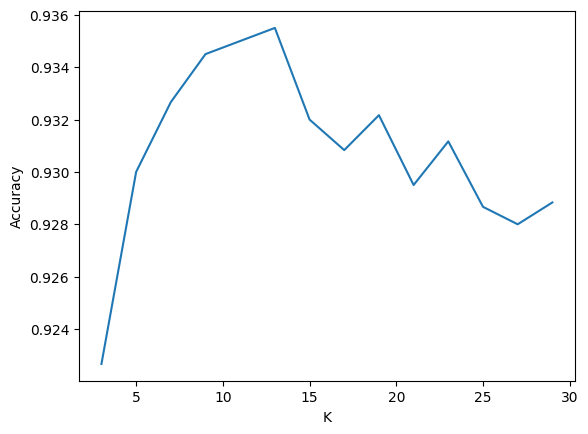

In [ ]:
acc = {}
for k in range(3, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc[k] = accuracy_score(y_test, y_pred)

# PLotting K v/s accuracy graph
plt.plot(range(3,30,2), acc.values())
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9355
                       precision    recall  f1-score   support

     advanced_backend       0.95      0.92      0.93       986
advanced_data_science       0.91      0.93      0.92      1048
   advanced_front_end       0.94      0.95      0.94       996
     beginner_backend       0.93      0.91      0.92       994
beginner_data_science       0.94      0.94      0.94       969
   beginner_front_end       0.95      0.96      0.95      1007

             accuracy                           0.94      6000
            macro avg       0.94      0.94      0.94      6000
         weighted avg       0.94      0.94      0.94      6000

